### 차트 작성 시 한글 깨짐 방지를 위한 koreanize-matplotlib 설치

In [ ]:
!pip3 install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [2]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.1 MB/s eta 0:00:00


### 라이브러리 import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 로드 및 확인

In [5]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [ ]:
# 타겟 변수(target)의 클래스 불균형 확인
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))

target
1    357
0    212
Name: count, dtype: int64
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


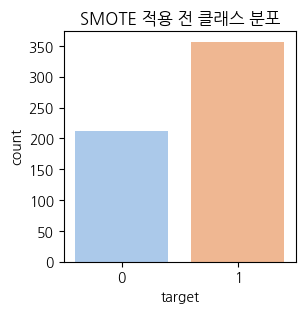

In [8]:
# 시각화(SMOTE 적용 전 클래스 분포)
plt.figure(figsize=(3, 3))
sns.countplot(x='target', data=df, palette='pastel')
plt.title('SMOTE 적용 전 클래스 분포')
plt.show()

### 2. 데이터 전처리 및 분할

In [9]:
# Feature(X)와 Target(y) 분리
X = df.drop('target', axis=1)
y = df['target']

# 학습용/테스트용 데이터 분할 (8:2)
# stratify=y: 타겟 변수의 클래스 비율을 유지하며 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

학습 데이터: (455, 30)
테스트 데이터: (114, 30)


### 3. SMOTE 적용 (오버샘플링)

In [10]:
smote = SMOTE(random_state=42)

# 학습 데이터에만 SMOTE 적용
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 결과 확인
print("\n[SMOTE 적용 전 학습 데이터 분포]")
print(y_train.value_counts())

print("\n[SMOTE 적용 후 학습 데이터 분포]")
print(y_train_resampled.value_counts())


[SMOTE 적용 전 학습 데이터 분포]
target
1    285
0    170
Name: count, dtype: int64

[SMOTE 적용 후 학습 데이터 분포]
target
1    285
0    285
Name: count, dtype: int64


### 4. 모델 학습 및 비교 평가

In [11]:
# 4-1. 원본 데이터로 학습한 모델
model_orig = LogisticRegression(max_iter=1000, random_state=42)
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)

# 4-2. SMOTE 데이터로 학습한 모델
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = model_smote.predict(X_test)

# 평가 결과 출력
print("\n[1] 원본 데이터 학습 결과")
print(classification_report(y_test, y_pred_orig))

print("\n[2] SMOTE 적용 데이터 학습 결과")
print(classification_report(y_test, y_pred_smote))


[1] 원본 데이터 학습 결과
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


[2] SMOTE 적용 데이터 학습 결과
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

